[![Open In Colab](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/documentation/badge/open-in-colab.svg)](https://colab.research.google.com/github/crunchdao/quickstarters/blob/master/competitions/structural-break/quickstarters/baseline/baseline.ipynb)
[![Open In Kaggle](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/documentation/badge/open-in-kaggle.svg)](https://www.kaggle.com/code/crunchdao/structural-break-baseline)

![Banner](https://raw.githubusercontent.com/crunchdao/quickstarters/refs/heads/master/competitions/structural-break/assets/banner.webp)

# ADIA Lab Structural Break Challenge

## Challenge Overview

Welcome to the ADIA Lab Structural Break Challenge! In this challenge, you will analyze univariate time series data to determine whether a structural break has occurred at a specified boundary point.

### What is a Structural Break?

A structural break occurs when the process governing the data generation changes at a certain point in time. These changes can be subtle or dramatic, and detecting them accurately is crucial across various domains such as climatology, industrial monitoring, finance, and healthcare.

![Structural Break Example](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/competitions/structural-break/quickstarters/baseline/images/example.png)

### Your Task

For each time series in the test set, you need to predict a score between `0` and `1`:
- Values closer to `0` indicate no structural break at the specified boundary point;
- Values closer to `1` indicate a structural break did occur.

### Evaluation Metric

The evaluation metric is [ROC AUC (Area Under the Receiver Operating Characteristic Curve)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html), which measures the performance of detection algorithms regardless of their specific calibration.

- ROC AUC around `0.5`: No better than random chance;
- ROC AUC approaching `1.0`: Perfect detection.

# Setup

The first steps to get started are:
1. Get the setup command
2. Execute it in the cell below

### >> https://hub.crunchdao.com/competitions/structural-break/submit/notebook

![Reveal token](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/documentation/animations/reveal-token.gif)

In [3]:
print("hi")

hi


In [4]:
print("hellow world")

hellow world


In [4]:
# Install the Crunch CLI
%pip install --upgrade crunch-cli

# Setup your local environment
!crunch setup --notebook structural-break hello --token pwESIcTezySJpiKLd5r70lEA

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: requirements-parser
    Found existing installation: requirements-parser 0.9.0
    Uninstalling requirements-parser-0.9.0:
      Successfully uninstalled requirements-parser-0.9.0
crunch-cli, version 7.4.0

---
Your token seems to have expired or is invalid.

Please follow this link to copy and paste your new setup command:
https://hub.crunchdao.com/competitions/structural-break/submit

If you think that is an error, please contact an administrator.


In [5]:

!crunch setup-notebook structural-break tPMP5PL2vL4iHqdoAT0Vk70n

crunch-cli, version 7.4.0
you appear to have never submitted code before
data/X_train.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/X_train.parquet (204327238 bytes)
data/X_test.reduced.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/X_test.reduced.parquet (2380918 bytes)
data/y_train.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/y_train.parquet (61003 bytes)
data/y_test.reduced.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/y_test.reduced.parquet (2655 bytes)
                                
---
Success! Your environment has been correctly setup.
Next recommended actions:
1. Load the Crunch Toolings: `crunch = crunch.load_notebook()`
2. Execute the cells with your code
3. Run a test: `crunch.test()`
4. Download and submit your code to t

# Your model

## Setup

In [1]:
import os
import typing

# Import your dependencies
import joblib
import pandas as pd
import scipy
import sklearn.metrics

In [6]:
import crunch

# Load the Crunch Toolings
crunch = crunch.load_notebook()

loaded inline runner with module: <module '__main__'>

cli version: 7.4.0
available ram: 12.67 gb
available cpu: 2 core
----


## Understanding the Data

The dataset consists of univariate time series, each containing ~2,000-5,000 values with a designated boundary point. For each time series, you need to determine whether a structural break occurred at this boundary point.

The data was downloaded when you setup your local environment and is now available in the `data/` directory.

In [10]:
# Load the data simply
X_train, y_train, X_test = crunch.load_data()

data/X_train.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/X_train.parquet (204327238 bytes)
data/X_train.parquet: already exists, file length match
data/X_test.reduced.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/X_test.reduced.parquet (2380918 bytes)
data/X_test.reduced.parquet: already exists, file length match
data/y_train.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/y_train.parquet (61003 bytes)
data/y_train.parquet: already exists, file length match
data/y_test.reduced.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/y_test.reduced.parquet (2655 bytes)
data/y_test.reduced.parquet: already exists, file length match


### Understanding `X_train`

The training data is structured as a pandas DataFrame with a MultiIndex:

**Index Levels:**
- `id`: Identifies the unique time series
- `time`: The timestep within each time series

**Columns:**
- `value`: The actual time series value at each timestep
- `period`: A binary indicator where `0` represents the **period before** the boundary point, and `1` represents the **period after** the boundary point

In [8]:
import scipy.stats as stats

In [11]:
import numpy as np




In [21]:
data = X_train.loc[0:10]

In [39]:
np.array(data.loc[0].period == 0)

array([ True,  True,  True, ..., False, False, False])

In [35]:
df.iloc[idx].iloc[500]

,1
value,0.003705
period,0.000000


In [47]:
idx = data.loc[0].period == 0
idx = np.array(idx)
idx

array([ True,  True,  True, ..., False, False, False])

In [52]:
dummy_idx = np.array([True, False, False, True])
dummy_df = pd.DataFrame([[1,2],[3,4],[5,6],[7,8]],columns=["A","B"])



In [53]:
dummy_df.loc[dummy_idx]

,A,B
0,1,2
3,7,8


In [57]:
idx = data.loc[0].period == 0
idx = np.array(idx)

df = data.loc[0]

smp1 = df.iloc[idx].value
smp2 = df.iloc[~idx].value

smp1_shift = smp1.shift(1)
smp2_shift = smp2.shift(1)

diffs_1 = smp1-smp1_shift
diffs_2 = smp2-smp2_shift

squared_diff1 = (diffs_1**2)
mean_squared_diff1 = squared_diff1.mean()

squared_diff2 = (diffs_2**2)
mean_squared_diff2 = squared_diff2.mean()


In [61]:
squared_diff1.value.mean()

np.float64(0.00011282134613809584)

In [56]:
smp1_shift

,value,period
time,,
0,NaN,NaN
1,-0.005564,0.0
2,0.003705,0.0
3,0.013164,0.0
4,0.007151,0.0
...,...,...
1346,-0.005802,0.0
1347,0.003705,0.0
1348,0.006672,0.0


In [55]:
smp1

,value,period
time,,
0,-0.005564,0
1,0.003705,0
2,0.013164,0
3,0.007151,0
4,-0.009979,0
...,...,...
1346,0.003705,0
1347,0.006672,0
1348,0.002796,0


In [45]:
df.value.iloc[idx]

,value
time,
1,0.003705
1,0.003705
1,0.003705
1,0.003705
1,0.003705
...,...
0,-0.005564
0,-0.005564
0,-0.005564


In [25]:
smp1

,value,period
time,,
1,0.003705,0
1,0.003705,0
1,0.003705,0
1,0.003705,0
1,0.003705,0
...,...,...
0,-0.005564,0
0,-0.005564,0
0,-0.005564,0


In [20]:
data.loc[0]

,value,period
time,,
0,-0.005564,0
1,0.003705,0
2,0.013164,0
3,0.007151,0
4,-0.009979,0
...,...,...
1640,0.001638,1
1641,0.000257,1
1642,0.010160,1


In [65]:
a = []
b = [2,4,5]
c = [8,9,10]
a.append(b)
a.append(c)
a

[[2, 4, 5], [8, 9, 10]]

In [73]:
#Lets make a function that takes as input one of the distributions and then calculates std_dev of the two samples, mean of two samples, KS_test results
#I will have some other function that loops through the dfs in the multiindex df and apply this






def interesting_stats(df):
    idx = np.array(df.period==0)
  #creates index where 0 is before structed break

    smp1 = df.iloc[idx].value
    smp2 = df.iloc[~idx].value

    mean_smp1 = smp1.mean()
    mean_smp2 = smp1.mean()

    mean_diff = mean_smp2 - mean_smp1

    std_smp1 = smp1.std()
    std_smp2 = smp2.std()

    std_diff = std_smp2 - std_smp1

    smp1_shift = smp1.shift(1)
    smp2_shift = smp2.shift(1)

    diffs_1 = smp1-smp1_shift
    diffs_2 = smp2-smp2_shift

    squared_diff1 = (diffs_1**2)
    mean_squared_diff1 = squared_diff1.mean()

    squared_diff2 = (diffs_2**2)
    mean_squared_diff2 = squared_diff2.mean()



    ks_stat = stats.ks_2samp(smp1, smp2).statistic
    ks_p = stats.ks_2samp(smp1, smp2).pvalue

    return [mean_smp1, mean_smp2, mean_diff, mean_squared_diff1,
            mean_squared_diff2,std_smp1,std_smp2,std_diff,ks_stat,ks_p]


data = X_train

outer_indicies = list(set(data.index.get_level_values("id")))
the_stats = []


for outer_idx in outer_indicies:
  the_stats.append(interesting_stats(data.loc[outer_idx]))

  if outer_idx/223


stats_cols = ["mean_smp1","mean_smp2","mean_diff","mean_squared_diff1","mean_squared_diff2",
              "std_smp1","std_smp2","std_diff","ks_stat","ks_p"]
data_stats = pd.DataFrame(the_stats,columns=stats_cols)



In [74]:
data_stats

,mean_smp1,mean_smp2,mean_diff,mean_squared_diff1,mean_squared_diff2,std_smp1,std_smp2,std_diff,ks_stat,ks_p
0,1.458941e-05,1.458941e-05,0.0,0.000113,0.000102,0.006987,0.006877,-1.106835e-04,0.032727,0.949424
1,1.284348e-04,1.284348e-04,0.0,0.000012,0.000009,0.002524,0.002036,-4.887576e-04,0.081409,0.067921
2,3.892051e-04,3.892051e-04,0.0,0.000657,0.001229,0.017221,0.022900,5.678264e-03,0.090388,0.001878
3,3.812864e-04,3.812864e-04,0.0,0.000142,0.000163,0.008388,0.009286,8.976946e-04,0.040356,0.386606
4,-1.596267e-05,-1.596267e-05,0.0,0.000010,0.000010,0.003314,0.003408,9.445943e-05,0.022053,0.993224
...,...,...,...,...,...,...,...,...,...,...
496,-9.260426e-07,-9.260426e-07,0.0,0.000002,0.000002,0.000939,0.000938,-8.563961e-07,0.038512,0.444921
497,6.922925e-04,6.922925e-04,0.0,0.000355,0.000209,0.013333,0.010008,-3.325565e-03,0.050250,0.070157
498,2.065132e-05,2.065132e-05,0.0,0.000013,0.000017,0.002662,0.002713,5.139480e-05,0.056101,0.064842
499,-7.610750e-04,-7.610750e-04,0.0,0.001452,0.001900,0.025918,0.028428,2.510211e-03,0.138239,0.000149


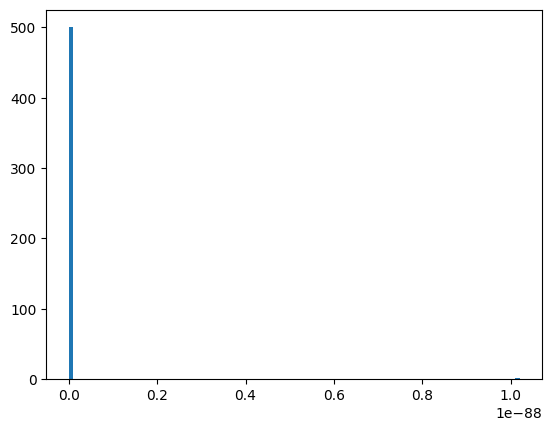

In [121]:
import matplotlib.pyplot as plt

_ = plt.hist(ks_test_results.ks_p,bins = 100)

In [116]:
data_train_sub

value  period
id  time                  
0   0    -0.005564       0
    1     0.003705       0
    2     0.013164       0
    3     0.007151       0
    4    -0.009979       0
...            ...     ...
500 2326 -0.020000       1
    2327 -0.001276       1
    2328  0.019157       1
    2329 -0.002506       1
    2330 -0.010050       1

[1197767 rows x 2 columns]

In [107]:
ks_test_results

,ks_stat__ks_p
id,
0,"(0.8212765957446808, 0.0)"
1,"(0.8884934756820878, 0.0)"
2,"(0.8191713483146067, 0.0)"
3,"(1.0, 0.0)"
4,"(0.7841930903928065, 0.0)"
5,"(1.0, 0.0)"
6,"(1.0, 0.0)"
7,"(0.7167106752168992, 0.0)"
8,"(0.8580159849553362, 0.0)"


### Understanding `y_train`

This is a simple `pandas.Series` that tells if a dataset id has a structural breakpoint or not.

**Index:**
- `id`: the ID of the dataset

**Value:**
- `structural_breakpoint`: Boolean indicating whether a structural break occurred (`True`) or not (`False`)

In [12]:
y_train

,structural_breakpoint
id,
0,False
1,False
2,True
3,False
4,False
...,...
9996,False
9997,False
9998,False


### Understanding `X_test`

The test data is provided as a **`list` of `pandas.DataFrame`s** with the same format as [`X_train`](#understanding-X_test).

It is structured as a list to encourage processing records one by one, which will be mandatory in the `infer()` function.

In [13]:
print("Number of datasets:", len(X_test))

Number of datasets: 101


In [14]:
X_test[0]

value  period
id    time                  
10001 0     0.010753       0
      1    -0.031915       0
      2    -0.010989       0
      3    -0.011111       0
      4     0.011236       0
...              ...     ...
      2774 -0.013937       1
      2775 -0.015649       1
      2776 -0.009744       1
      2777  0.025375       1
      2778 -0.001515       1

[2779 rows x 2 columns]

## Strategy Implementation

There are multiple approaches you can take to detect structural breaks:

1. **Statistical Tests**: Compare distributions before and after the boundary point;
2. **Feature Engineering**: Extract features from both segments for comparison;
3. **Time Series Modeling**: Detect deviations from expected patterns;
4. **Machine Learning**: Train models to recognize break patterns from labeled examples.

The baseline implementation below uses a simple statistical approach: a t-test to compare the distributions before and after the boundary point.

### The `train()` Function

In this function, you build and train your model for making inferences on the test data. Your model must be stored in the `model_directory_path`.

The baseline implementation below doesn't require a pre-trained model, as it uses a statistical test that will be computed at inference time.

In [15]:
def train(
    X_train: pd.DataFrame,
    y_train: pd.Series,
    model_directory_path: str,
):

    # For our baseline t-test approach, we don't need to train a model
    # This is essentially an unsupervised approach calculated at inference time
    from sklearn.ensemble import HistGradientBoostingClassifier



    model = None

    # You could enhance this by training an actual model, for example:
    # 1. Extract features from before/after segments of each time series
    # 2. Train a classifier using these features and y_train labels
    # 3. Save the trained model

    joblib.dump(model, os.path.join(model_directory_path, 'model.joblib'))

### The `infer()` Function

In the inference function, your trained model (if any) is loaded and used to make predictions on test data.

**Important workflow:**
1. Load your model;
2. Use the `yield` statement to signal readiness to the runner;
3. Process each dataset one by one within the for loop;
4. For each dataset, use `yield prediction` to return your prediction.

**Note:** The datasets can only be iterated once!

In [16]:
def infer(
    X_test: typing.Iterable[pd.DataFrame],
    model_directory_path: str,
):
    model = joblib.load(os.path.join(model_directory_path, 'model.joblib'))

    yield  # Mark as ready

    # X_test can only be iterated once.
    # Before getting the next dataset, you must predict the current one.
    for dataset in X_test:
        # Baseline approach: Compute t-test between values before and after boundary point
        # The negative p-value is used as our score - smaller p-values (larger negative numbers)
        # indicate more evidence against the null hypothesis that distributions are the same,
        # suggesting a structural break
        def t_test(u: pd.DataFrame):
            return -scipy.stats.ttest_ind(
                u["value"][u["period"] == 0],  # Values before boundary point
                u["value"][u["period"] == 1],  # Values after boundary point
            ).pvalue

        prediction = t_test(dataset)
        yield prediction  # Send the prediction for the current dataset

        # Note: This baseline approach uses a t-test to compare the distributions
        # before and after the boundary point. A smaller p-value (larger negative number)
        # suggests stronger evidence that the distributions are different,
        # indicating a potential structural break.

## Local testing

To make sure your `train()` and `infer()` function are working properly, you can call the `crunch.test()` function that will reproduce the cloud environment locally. <br />
Even if it is not perfect, it should give you a quick idea if your model is working properly.

In [17]:
crunch.test(
    # Uncomment to disable the train
    # force_first_train=False,

    # Uncomment to disable the determinism check
    # no_determinism_check=True,
)

11:34:05 no forbidden library found
11:34:05 
11:34:05 started
11:34:05 running local test
11:34:05 internet access isn't restricted, no check will be done
11:34:05 
11:34:06 starting unstructured loop...
11:34:06 executing - command=train


data/X_train.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/X_train.parquet (204327238 bytes)
data/X_train.parquet: already exists, file length match
data/X_test.reduced.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/X_test.reduced.parquet (2380918 bytes)
data/X_test.reduced.parquet: already exists, file length match
data/y_train.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/y_train.parquet (61003 bytes)
data/y_train.parquet: already exists, file length match
data/y_test.reduced.parquet: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/data-releases/146/y_test.reduced.parquet (2655 bytes)
data/y_test.reduced.parquet: already exists, file length match


11:34:08 executing - command=infer
11:34:08 checking determinism by executing the inference again with 30% of the data (tolerance: 1e-08)
11:34:08 executing - command=infer
11:34:08 determinism check: passed
11:34:08 save prediction - path=data/prediction.parquet
11:34:08 ended
11:34:08 duration - time=00:00:03
11:34:08 memory - before="811.96 MB" after="823.27 MB" consumed="11.31 MB"


## Results

Once the local tester is done, you can preview the result stored in `data/prediction.parquet`.

In [18]:
prediction = pd.read_parquet("data/prediction.parquet")
prediction

,prediction
id,
10001,-0.590381
10002,-0.363831
10003,-0.731208
10004,-0.762609
10005,-0.527371
...,...
10097,-0.539917
10098,-0.843084
10099,-0.203762


### Local scoring

You can call the function that the system uses to estimate your score locally.

In [19]:
# Load the targets
target = pd.read_parquet("data/y_test.reduced.parquet")["structural_breakpoint"]

# Call the scoring function
sklearn.metrics.roc_auc_score(
    target,
    prediction,
)

np.float64(0.48450704225352115)

# Submit your Notebook

To submit your work, you must:
1. Download your Notebook from Colab
2. Upload it to the platform
3. Create a run to validate it

### >> https://hub.crunchdao.com/competitions/structural-break/submit/notebook

![Download and Submit Notebook](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/documentation/animations/download-and-submit-notebook.gif)